# **Lab 2**


### Question:
#### Write a python program to simulate a neural network model for calculating the error function and its surface.


### Solution:

#### Import and Libraries and Data

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('iris.data')
df.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


#### Data Pre-Processing

We will convert the output lable from class name to numerical value, e.g. 

`Iris-setosa -> 0`,
 
`Iris-versicolor -> 1` and so on.

In [4]:
def target_converter(Lable):
    # To change class lable into numerial variable
    A = []
    output = []
    x = 0
    # Append value if not present in A
    for i in Lable:
        if (i not in A):
            A.append(i)
            x += 1
    # Increase Count If Present in A
    for i in Lable:
        x = A.index(i)
        output.append(x)
        
    return(np.array(output))

In [66]:
X = np.array(df)[:,0:4]
X[:5]

array([[4.9, 3.0, 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5.0, 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4]], dtype=object)

In [65]:
Y = np.array(df)[:,4]
Y = target_converter(Y)
Y[:5]

array([0, 0, 0, 0, 0])

#### Transfer Function and Error

In [111]:
# Sigmoid(Log Sigmoidal) transfer function
def sigmoid(n):
    return 1/(1+np.exp(-n))

# Misclassification Error
def error(val,tar):
    if val == tar:
        return 0
    
    else:
        return 1

#### Neural Network Architecture
As iris have 4 input layers and 3 output layers we will use $3X4$ matrix to represent the weight. We will use log-sigmoidal function as transfer function , because it outputs the value between 0 and 1. We will use these values as probabilities to determine the output of the perticular pattern. At last we will use classification error as 0 when output is right, otherwise 1.

The Neural Network Representation is as follows:

![](NuralNet _iris.png)

In [105]:
def neuron(x,y,epoch):

    tot_err = []
    # Loop through n(Epoch) number of times
    for _ in range(epoch):
        # Error List for each Epoch
        err_list = []

        for i,j in zip(x,y):
            # For each iteration actual output list
            ao_list = []

            # Rangdomly Generated Weight
            w = np.random.rand(3,4)
            net = np.dot(i,w.T)

            # Actual output List for each iteration
            for n in net:
                ao = sigmoid(n)
                ao_list.append(ao)

            # Taking the maximum probality among the outputs
            out = ao_list.index(max(ao_list))

            err = error(out,j)
            err_list.append(err)

        tot_err.append(err_list)

    # X and Y axis for plotting
    ax = plt.axes(projection = '3d')
    x_axis = np.arange(1,len(y) + 1,step = 1)
    y_axis = np.arange(1,epoch + 1,step = 1)
    # Using Meshgrid for generating 2D Matrices of X and Y axis
    X_Axis, Y_Axis = np.meshgrid(x_axis,y_axis)
    z_axis = np.array(tot_err)
    
    # Plotting 3D Scatter Plot
    ax.scatter3D(X_Axis,Y_Axis,z_axis, c = z_axis)
    ax.set_xlabel('Pattern')
    ax.set_ylabel('Epoch')
    ax.set_zlabel('Error')
    plt.show()

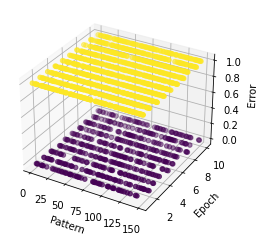

In [106]:
neuron(X,Y,10)